## 寫爬蟲抓蘋果新聞

In [5]:
import requests
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
url_ary = []
for i in range(1,40):
    res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/{}'.format(i))
    soup = BeautifulSoup(res.text, 'html.parser')
    for a in soup.select('.rtddt a'):
        url_ary.append(domain + a['href'])

In [10]:
#print(url_ary)

In [12]:
articles = []
#url = 'http://www.appledaily.com.tw/realtimenews/article/international/20170616/1141992/%E6%B8%AF%E8%AD%B0%E5%93%A1%E8%A2%AB%E6%8C%87%E6%94%B6%E5%8F%97%E9%BB%8E%E6%99%BA%E8%8B%B1%E6%8D%90%E6%AC%BE%E6%A1%88%E3%80%80%E4%B8%8B%E6%9C%8831%E6%97%A5%E8%A3%81%E6%B1%BA'
for url in url_ary:
    try:
        dic = {}
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'html.parser')
        dic['title'] = soup.select('#h1')[0].text
        dic['summary']=soup.select('#summary')[0].text
        dic['url'] = url
        articles.append(dic)
    except:
        pass

In [18]:
import pandas
newsdf = pandas.DataFrame(articles)
newsdf = newdf.drop_duplicates()
newsdf.to_excel('news.xlsx')

## 讀取新聞資料

In [21]:
import pandas
newsdf = pandas.read_excel('news.xlsx')

In [22]:

newsdf.head()

,summary,title,url
0,（更新：影片）連日豪大雨，連續多次民調倒數第一的嘉義市長涂醒哲，罕見地透過區政系統問各里里長...,吐氣揚眉「這次沒淹」 涂醒哲公開信宣揚,http://www.appledaily.com.tw/realtimenews/arti...
1,（更新戰況）15:288局下，2出局二、三壘有人，陽岱鋼未能把握機會，擊出三壘滾地球出局。雙...,【更新】陽岱鋼第4打席未能建功 雙方3比3平手,http://www.appledaily.com.tw/realtimenews/arti...
2,（更新：新增影片）高雄市黃姓男子（55歲，恐嚇、毀損前科）在傳統市場賣魚多年，覺得賣魚賺不了...,「蚵仔」當暗號 魚販賣毒被逮還比Ya！,http://www.appledaily.com.tw/realtimenews/arti...
3,(更新：男單決賽)15:11男子世界排名前2中國2名好手球王馬龍、20歲新星樊振東重演世界錦...,【更新】日本桌球公開賽 17歲中國新星首個國際賽就封后,http://www.appledaily.com.tw/realtimenews/arti...
4,法國精品品牌LOUIS VUITTON（路易威登，簡稱LV）的商品以卓越品質著稱，但英國《衛...,LV「義大利製造」名鞋 竟是羅馬尼亞生產的,http://www.appledaily.com.tw/realtimenews/arti...


## 資料預處理 (文章切詞, 轉詞頻矩陣)

In [24]:
import jieba

title_ary = []
article_ary = []

for news in newsdf.iterrows():
    article_ary.append(' '.join(jieba.cut(news[1].summary)))
    title_ary.append(news[1].title)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\NTCB\AppData\Local\Temp\jieba.cache
Loading model cost 1.123 seconds.
Prefix dict has been built succesfully.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(article_ary)

## 計算 Cosine Similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X,X)

## 資料分群

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 23, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(cosine_similarities)

In [96]:
import numpy 
from collections import Counter
#title_npary = numpy.array(title_ary)
Counter(y_kmeans)
for ele in title_npary[y_kmeans == 10]:
    print(ele)

台巴斷交與海峽論壇 不知今夕是何夕？
巴拿馬副外長：與中國建交是正確決定 
俞正聲：反對一切形形色色分裂行徑
​林青弘專欄：兩岸不同中國 習近平要覺醒
一張圖表帶你看　巴拿馬斷交欺矇我國的五大手法
閉門會面洪秀柱　俞正聲：兩岸終究會統一
洪秀柱會俞正聲：兩岸不可能只交流　卻不解決政治爭議
柱柱姊參加海峽論壇　俞正聲：兩岸非國與國關係
巴拿馬欺矇手法大公開　斷交四小時前還丟煙幕彈
巴拿馬副總統：多年前就想和中國建交
【斷交解密】政府高層：巴拿馬總統等4人密謀
巴拿馬斷交　官員：台巴FTA暫時仍有效 
台巴斷交　綠委直諫：不應只局限抵制中國
國家主權，一退則潰
山東農民亂丟菸頭　燒掉自家5畝田
比起民進黨 中國更放心不下國民黨
【財訊】梁寶華：雨過之後天不晴
​中共打壓 成了誰的利多？
港中聯辦：香港與中國發展不同政治　是幻覺
這些台灣女孩在中國　直播告訴大家中國之美


In [63]:
import matplotlib.pyplot as plt
from sklearn import metrics
sil = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    sil.append(metrics.silhouette_score(X, y_kmeans))


In [77]:
range(2, 30)

range(2, 30)

In [69]:
sil

[0.68657755009668642,
 0.3265812478092659,
 0.29924662504736149,
 0.29019646204313754,
 0.017261087301740592,
 0.16561387252464285,
 0.27135632273781324,
 0.10730117375395527,
 -0.046533520029896684,
 -0.06070595588319546,
 -0.098024056781721339,
 0.18620392566245481,
 -0.046606390591212861,
 -0.030054075385257135,
 -0.037996056879595973,
 0.10482090141233751,
 0.14401320471278178,
 -0.028394305861380177,
 0.14754805219223815,
 0.088470719322087971,
 -0.16017816556604708,
 0.12900143204329928,
 -0.14988283050084425,
 0.096258252593387661,
 0.075358885954781213,
 -0.16501825604160034,
 0.04770845357691518,
 0.034887093412729088]

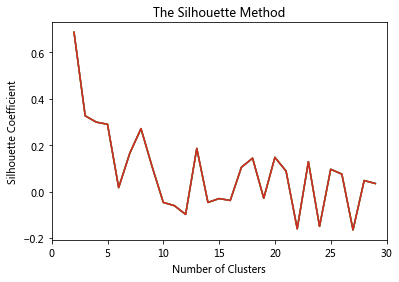

In [80]:
plt.plot(range(2,30), sil,)
plt.xlim([0,30])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

## 文字探勘

In [97]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

In [98]:
b = '今天天氣真好' 

In [99]:
! pip install jieba

In [100]:
import jieba
for ele in jieba.cut(b):
    print(ele)

今天
天氣
真好


In [101]:
jieba.add_word('何壽川')

In [102]:
sentence = ['何壽川遭聲押　邱正雄緊急代理永豐金董事長','何壽川涉弊案　永豐金、金管會下周一嚴陣以待']
seg_ary =[]
for s in sentence:
    seg_ary.append(' '.join([w for w in jieba.cut(s)]))

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(seg_ary)

In [104]:
print(vectorizer.get_feature_names())
X.toarray()

['下周一', '代理', '以待', '何壽川', '嚴陣', '正雄', '永豐金', '涉弊', '緊急', '董事', '遭聲', '金管會']


array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]], dtype=int64)

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X,X)

In [106]:
cosine_similarities

array([[ 1.        ,  0.28571429],
       [ 0.28571429,  1.        ]])

## 文字分類

In [109]:
import requests
from bs4 import BeautifulSoup
domain = 'http://www.appledaily.com.tw'
category_ary = []
for i in range(1,40):
    res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/{}'.format(i))
    soup = BeautifulSoup(res.text, 'html.parser')
    for a in soup.select('.rtddt a'):
        category_ary.append({'category':a.select('h2')[0].text,'url':domain + a['href']})

In [111]:
cat_df = pandas.DataFrame(category_ary)
#cat_df

In [115]:
finaldf = pandas.merge(newsdf, cat_df, left_on = 'url', right_on = 'url')

In [119]:
df = finaldf[(finaldf['category'] == '社會') |  (finaldf['category'] == '財經')]

In [121]:
import jieba

cat_ary = []
title_ary = []
article_ary = []

for news in df.iterrows():
    article_ary.append(' '.join(jieba.cut(news[1].summary)))
    title_ary.append(news[1].title)
    cat_ary.append( 0 if news[1].category == '社會' else 1)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(article_ary)

In [132]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha =0.8)
clf.fit(X, cat_ary)

MultinomialNB(alpha=0.8, class_prior=None, fit_prior=True)

In [133]:
pred = clf.predict(X)

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cat_ary, pred)

array([[163,   0],
       [  0,  60]])